<a href="https://colab.research.google.com/github/gaston411/Mi-Proyecto/blob/main/beto_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERT

In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 44.8 MB/s 
     |████████████████████████████████| 596 kB 41.6 MB/s 
     |████████████████████████████████| 101 kB 11.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
a = "purple is the best city in the forest"
b = "there is an art to getting your way and throwing bananas on to the street is not it"  # this is very similar to 'g'
c = "it is not often you find soggy bananas on the street"
d = "green should have smelled more tranquil but somehow it just tasted rotten"
e = "joyce enjoyed eating pancakes with ketchup"
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled"
g = "to get your way you must not bombard the road with yellow fruit"  # this is very similar to 'b'

In [5]:
from transformers import AutoTokenizer, AutoModel
import torch

In [6]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

In [7]:
tokens = tokenizer([a, b, c, d, e, f, g],
                          max_length=128,
                          truncation=True,
                          padding='max_length',
                          return_tensors='pt')

In [8]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [9]:
tokens['input_ids'][0]

tensor([ 101, 6379, 2003, 1996, 2190, 2103, 1999, 1996, 3224,  102,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])

In [10]:
outputs = model(**tokens)
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [11]:
embeddings = outputs.last_hidden_state
embeddings[0]

tensor([[-0.6239, -0.2058,  0.0411,  ...,  0.1490,  0.5681,  0.2381],
        [-0.3694, -0.1485,  0.3780,  ...,  0.4204,  0.5553,  0.1441],
        [-0.7221, -0.3813,  0.2031,  ...,  0.0761,  0.5162,  0.2813],
        ...,
        [-0.1894, -0.3711,  0.3034,  ...,  0.1536,  0.3265,  0.1376],
        [-0.2496, -0.5227,  0.2341,  ...,  0.3419,  0.3164,  0.0256],
        [-0.3311, -0.4430,  0.3492,  ...,  0.3655,  0.2910,  0.0728]],
       grad_fn=<SelectBackward0>)

In [12]:
embeddings[0].shape

torch.Size([128, 768])

In [13]:
mask = tokens['attention_mask'].unsqueeze(-1).expand(embeddings.size()).float()
mask.shape

torch.Size([7, 128, 768])

In [14]:
mask[0]

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [15]:
masked_embeddings = embeddings * mask
masked_embeddings[0]

tensor([[-0.6239, -0.2058,  0.0411,  ...,  0.1490,  0.5681,  0.2381],
        [-0.3694, -0.1485,  0.3780,  ...,  0.4204,  0.5553,  0.1441],
        [-0.7221, -0.3813,  0.2031,  ...,  0.0761,  0.5162,  0.2813],
        ...,
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<SelectBackward0>)

In [16]:
summed = torch.sum(masked_embeddings, 1)
summed.shape

torch.Size([7, 768])

In [17]:
counted = torch.clamp(mask.sum(1), min=1e-9)
counted.shape

torch.Size([7, 768])

In [18]:
mean_pooled = summed / counted #Estos son nuestros vectores de oraciones.
mean_pooled.shape

torch.Size([7, 768])

In [19]:
# Buscamos la similitus coseno
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [20]:
# convert to numpy array from torch tensor
mean_pooled = mean_pooled.detach().numpy()

# calculate similarities (will store in array)
scores = np.zeros((mean_pooled.shape[0], mean_pooled.shape[0]))
for i in range(mean_pooled.shape[0]):
    scores[i, :] = cosine_similarity(
        [mean_pooled[i]],
        mean_pooled
    )[0]

In [21]:
scores

array([[ 1.00000036,  0.18692756,  0.28297701,  0.29628256,  0.27451015,
         0.10176265,  0.21696275],
       [ 0.18692756,  1.00000024,  0.72058785,  0.51428938,  0.11749659,
         0.19306947,  0.66182339],
       [ 0.28297701,  0.72058785,  1.00000012,  0.4886443 ,  0.23568964,
         0.1715714 ,  0.5599308 ],
       [ 0.29628256,  0.51428938,  0.4886443 ,  0.99999976,  0.26985508,
         0.37889439,  0.52388817],
       [ 0.27451017,  0.11749662,  0.23568963,  0.26985508,  1.00000024,
         0.23422134, -0.01599768],
       [ 0.10176267,  0.1930695 ,  0.1715714 ,  0.37889427,  0.23422134,
         1.00000036,  0.22319682],
       [ 0.21696278,  0.66182333,  0.5599308 ,  0.52388817, -0.01599768,
         0.22319683,  0.99999988]])

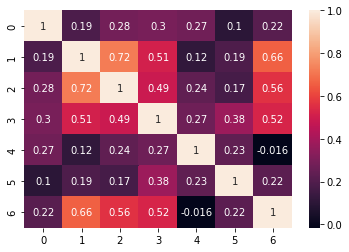

In [22]:
import seaborn as sns
sns.heatmap(scores,annot=True)

In [24]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 1.2 MB 34.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=46891d39f6e0bd7c0cb041c0d41f00472976180ac1d425622e4f08dcba29fbf1
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [25]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [26]:
sentence_embeddings = model.encode([a, b, c, d, e, f, g])

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# calculate similarities (will store in array)
scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
for i in range(sentence_embeddings.shape[0]):
    scores[i, :] = cosine_similarity(
        [sentence_embeddings[i]],
        sentence_embeddings
    )[0]

In [28]:
scores

array([[ 1.00000036,  0.18692765,  0.28297701,  0.29628256,  0.27451015,
         0.10176264,  0.21696275],
       [ 0.18692765,  1.        ,  0.72058785,  0.51428944,  0.11749655,
         0.19306952,  0.66182357],
       [ 0.28297701,  0.72058785,  1.00000012,  0.4886443 ,  0.23568964,
         0.17157143,  0.5599308 ],
       [ 0.29628256,  0.51428944,  0.4886443 ,  0.99999976,  0.26985508,
         0.37889436,  0.52388817],
       [ 0.27451017,  0.11749656,  0.23568963,  0.26985508,  1.00000024,
         0.23422137, -0.01599768],
       [ 0.10176265,  0.19306953,  0.1715714 ,  0.3788943 ,  0.23422137,
         1.00000024,  0.22319683],
       [ 0.21696278,  0.66182357,  0.5599308 ,  0.52388817, -0.01599768,
         0.22319682,  0.99999988]])

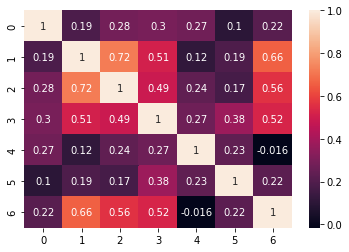

In [29]:
sns.heatmap(scores, annot=True)

In [30]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('dccuchile/bert-base-spanish-wwm-cased')
embeddings = model.encode(sentences)
print(embeddings)


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/648 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/364 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/dccuchile_bert-base-spanish-wwm-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at /root/.cache/torch/sentence_transformers/dccuc

[[-0.3833326   0.25313267 -0.50062776 ... -0.1097329  -0.0155858
  -0.42746824]
 [-0.31825754  0.26287922 -0.23416442 ... -0.20329538  0.13960756
  -0.08673388]]


In [31]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('dccuchile/bert-base-spanish-wwm-cased')

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/dccuchile_bert-base-spanish-wwm-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at /root/.cache/torch/sentence_transformers/dccuc

In [40]:
sentence = ['I-PROEMIO: Sr. JUEZ NACIONAL:HORTAS MARIA ANDREA S. perito medico de oficio en los siguientes autos, con domicilio constituido en la calle Austria 3º piso Dpto.  de esta Capital Z , tel. - domicilio electronico mashortas@,  -3 en cumplimiento lo dispuesto por  referente a los presentes autos y despues de haber examinado a quien dijo ser Boiero Franco Ivan quien se tomaron en el momento del examen el estado clinico actual se consideraron capacidad generica y en particular los puntos de pericia solicitados por las partes',
            'II-ANTECEDENTES DE INTERES MEDICO-LEGAL:las 5:h se encontraba en camino al trabajo y al cruzar la calle piso una piedra con el pie izquierdo que queda trabado girando su cuerpo y sufriendo una entorsis en su tobillo izquierdo asi o consecuencia del fuerte dolor es que da aviso a su empleador quien realiza la correspondiente denuncia a la ART donde le realizan estudios radiograficos le indican reposo y kinesiologia otorgandole el alta medica sin incapacidad. Cabe destacar que previo al accidente nunca presento tampoco ingresos a la ART por dolencias en la zona denunciada . Jamas se le realizo un examen preocupacional ni periodico . Sostiene que presenta una Incapacidad del 8%.',
            'accidente ocurrido fue denunciado a Swiss Medical bajo el siniestro el cual fue aceptado por el demandado, y se le brindo las prestaciones correspondientes en especie manteniendo la atencion hasta el en que fue dado de alta sin incapacidad.']

In [41]:
embeddings = model.encode(sentence)

# BETO

In [44]:
# Fist install the library and download the models from github

!pip install transformers
!wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/pytorch_weights.tar.gz 
!wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/vocab.txt 
!wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/config.json 
!tar -xzvf pytorch_weights.tar.gz
!mv config.json pytorch/.
!mv vocab.txt pytorch/.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-07-20 21:19:20--  https://users.dcc.uchile.cl/~jperez/beto/cased_2M/pytorch_weights.tar.gz
Resolving users.dcc.uchile.cl (users.dcc.uchile.cl)... 192.80.24.4, 200.9.99.211
Connecting to users.dcc.uchile.cl (users.dcc.uchile.cl)|192.80.24.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409871727 (391M) [application/x-gzip]
Saving to: ‘pytorch_weights.tar.gz’

pytorch_weights.tar 100%[===================>] 390.88M  9.46MB/s    in 49s     

2022-07-20 21:20:10 (8.04 MB/s) - ‘pytorch_weights.tar.gz’ saved [409871727/409871727]

--2022-07-20 21:20:10--  https://users.dcc.uchile.cl/~jperez/beto/cased_2M/vocab.txt
Resolving users.dcc.uchile.cl (users.dcc.uchile.cl)... 200.9.99.211, 192.80.24.4
Connecting to users.dcc.uchile.cl (users.dcc.uchile.cl)|200.9.99.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242120 (236K) [text/plain]


In [45]:
# import the necessary

import torch
from transformers import BertForMaskedLM, BertTokenizer

In [46]:
# create the tokenizer and the model

tokenizer = BertTokenizer.from_pretrained("pytorch/", do_lower_case=False)
model = BertForMaskedLM.from_pretrained("pytorch/")
e = model.eval()

Some weights of the model checkpoint at pytorch/ were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [54]:
# Now test it

text = '''[CLS] IV-CONSIDERACIONES MEDICO-LEGALES:
Comenta el Sr Boiero que mientras se dirigia al [MASK], corre para no
perder el tren pisando mal con su pie izquierdo por lo cual sufrio un esguince del
tobillo [MASK]. Fue asistido por la ART segun sus referencias donde se le brindo
tratamiento kinesico para luego que le den el alta con tareas habituales. A pesar de
que el actor refirio la persistencia de las dolencias. La demandada refiere que se
acepto el siniestro y se le brindo las prestaciones correspondientes hasta el alta. No
hay documentacion medica adjuntada en autos, sobre estudios o tratamientos
efectuados. [SEP]'''
masked_indxs = (14,35)

tokens = tokenizer.tokenize(text)
indexed_tokens = tokenizer.convert_tokens_to_ids(tokens)
tokens_tensor = torch.tensor([indexed_tokens])

predictions = model(tokens_tensor)[0]

for i,midx in enumerate(masked_indxs):
    idxs = torch.argsort(predictions[0,midx], descending=True)
    predicted_token = tokenizer.convert_ids_to_tokens(idxs[:5])
    print('MASK',i,':',predicted_token)

MASK 0 : [':', '-', '.', '¿', ',']
MASK 1 : ['tren', 'metro', 'vagón', 'ferrocarril', 'trenes']


In [55]:
tokens

['[CLS]',
 'IV',
 '-',
 'CONS',
 '##ID',
 '##ERA',
 '##CIONES',
 'MEDIC',
 '##O',
 '-',
 'LE',
 '##GA',
 '##LE',
 '##S',
 ':',
 'Coment',
 '##a',
 'el',
 'Sr',
 'Bo',
 '##ier',
 '##o',
 'que',
 'mientras',
 'se',
 'dirigi',
 '##a',
 'al',
 '[MASK]',
 ',',
 'corre',
 'para',
 'no',
 'perder',
 'el',
 'tren',
 'pis',
 '##ando',
 'mal',
 'con',
 'su',
 'pie',
 'izquierdo',
 'por',
 'lo',
 'cual',
 'sufri',
 '##o',
 'un',
 'es',
 '##gui',
 '##n',
 '##ce',
 'del',
 'tobillo',
 '[MASK]',
 '.',
 'Fue',
 'asistido',
 'por',
 'la',
 'ART',
 'segun',
 'sus',
 'referencias',
 'donde',
 'se',
 'le',
 'brin',
 '##do',
 'tratamiento',
 'k',
 '##ines',
 '##ico',
 'para',
 'luego',
 'que',
 'le',
 'den',
 'el',
 'alta',
 'con',
 'tareas',
 'habituales',
 '.',
 'A',
 'pesar',
 'de',
 'que',
 'el',
 'actor',
 'refi',
 '##rio',
 'la',
 'persistencia',
 'de',
 'las',
 'do',
 '##lencias',
 '.',
 'La',
 'demanda',
 '##da',
 'refiere',
 'que',
 'se',
 'acepto',
 'el',
 'sini',
 '##estro',
 'y',
 'se',
 'le',

# BERTOPIC

In [57]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 2.5 MB/s 
     |████████████████████████████████| 636 kB 29.1 MB/s 
     |████████████████████████████████| 5.2 MB 51.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 5.8 MB/s 
     |████████████████████████████████| 1.1 MB 52.6 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342119 sha256=ccdaf56becf8a86f172e35d6d053f41e515f25783446cd71f9a513288fcf92a7
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=0fccc0467a76947da9d08b635590bab08bb489e818dd7372e07ca6c4532e1934
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1f

In [1]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

KeyboardInterrupt: ignored

# análisis de preguntas-respuestas con beto

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importar
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
the_model = 'mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es'
tokenizer = AutoTokenizer.from_pretrained(the_model, do_lower_case=False)
model = AutoModelForQuestionAnswering.from_pretrained(the_model)

Downloading:   0%|          | 0.00/135 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/465 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/237k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

In [4]:
print(model)

BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [6]:
# Ejemplo tokenización
contexto = 'Estas conclusiones son en base al hecho que aun persiste las dificultades para la movilidad, los dolores, son consecuencia que persiste el esguince como se observa en la RMN solicitada .'
pregunta = '¿qué dificultades muestra?'

encode = tokenizer.encode_plus(pregunta, contexto, return_tensors='pt')
input_ids = encode['input_ids'].tolist()
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
for id, token in zip(input_ids[0], tokens):
  print('{:<12} {:>6}'.format(token, id))
  print('')

[CLS]             4

¿              1067

qué            1296

dificultades   6760

muestra        4744

?              1064

[SEP]             5

Estas          4063

conclusiones   7341

son            1404

en             1036

base           2606

al             1091

hecho          1802

que            1038

aun            6314

persist       13334

##e           30931

las            1089

dificultades   6760

para           1110

la             1030

movilidad     11550

,              1017

los            1065

dolores       20727

,              1017

son            1404

consecuencia   4549

que            1038

persist       13334

##e           30931

el             1040

es             1058

##gui          1300

##n           30935

##ce           1154

como           1184

se             1062

observa        8292

en             1036

la             1030

RM            29593

##N           30969

solicitada    21070

.              1009

[SEP]             5



In [7]:
# Ejemplo de inferencia (pregunta-respuesta)
nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)
salida = nlp({'question':pregunta, 'context':contexto})
print(salida)

{'score': 0.8496001958847046, 'start': 44, 'end': 91, 'answer': 'aun persiste las dificultades para la movilidad'}


In [8]:
from textwrap import wrap

def pregunta_respuesta(model, contexto, nlp):

  # Imprimir contexto
  print('Contexto:')
  print('-----------------')
  print('\n'.join(wrap(contexto)))

  # Loop preguntas-respuestas:
  continuar = True
  while continuar:
    print('\nPregunta:')
    print('-----------------')
    pregunta = str(input())

    continuar = pregunta!=''

    if continuar:
      salida = nlp({'question':pregunta, 'context':contexto})
      print('\nRespuesta:')
      print('-----------------')
      print(salida['answer'])

In [9]:
pregunta_respuesta(model, contexto, nlp)

Contexto:
-----------------
Estas conclusiones son en base al hecho que aun persiste las
dificultades para la movilidad, los dolores, son consecuencia que
persiste el esguince como se observa en la RMN solicitada .

Pregunta:
-----------------
¿que dificultades muestra?

Respuesta:
-----------------
aun persiste las dificultades para la movilidad

Pregunta:
-----------------
¿existen dolores?

Respuesta:
-----------------
aun persiste las dificultades para la movilidad, los dolores

Pregunta:
-----------------
¿por que tiene dificultades para moverse?

Respuesta:
-----------------
dolores

Pregunta:
-----------------
¿los dolores son consecuencia de que?

Respuesta:
-----------------
que persiste el esguince

Pregunta:
-----------------
¿cuales son las conclusiones?

Respuesta:
-----------------
aun persiste las dificultades para la movilidad

Pregunta:
-----------------



In [12]:
contexto = '''VII-CONCLUSIONES.
1.
Las secuelas en el tobillo izquierdo que presenta el actor es consecuencia
del accidente que padecio. El tratamiento que se le efectuo segun las referencias
del actor fueron las adecuadas en cuanto a la inmovilizacion y al tratamiento
kinesiologico, sin embargo, no se obtuvo el resultado satisfactorio. Podria
corresponder a una inmovilizacion no adecuada o a un tratamiento kinesico
incompleto.
2.
Estas conclusiones son en base al hecho que aun persiste las dificultades
para la movilidad, los dolores, son consecuencia que persiste el esguince como se
observa en la RMN solicitada .
3.
tendones y los musculos para mejorar la movilidad.
4.
de la misma articulacion, agravando aun mas el cuadro.
5.
Con respecto al daño psicologico, ya se ha expresado que no se ha
constatado que los sintomas que refirio el actor no afectaron las diferentes esferas
de su vida, no ha alterado la personal, familiar, de pareja. Se ah reinsertado en el
ambito laboral sin dificultades. Lo observado por esta perito es coincidente con lo
observado por el profesional que ha llevado a cabo el psicodiagnostico.
6.
Las dolencias y dificultades para la movilidad que presenta el actor
determina que presente dificultades intermedias para la realizacion de tareas
habituales, en vista que le genera dificultades para deambular, y estar de pie por
tiempo prolongado. No se considera que requiera recalificacion en vista que
desarrolla tareas laborales por su cuenta.
7.
Que a los efectos fiscales denuncio mi CUIT : 27--3 y me hallo
inscripta como RESPONSABLE INSCRIPTA por lo que al momento del deposito
de honorarios se CONSIDERE EL DEPOSITO DEL A
La articulacion es factible que por la inestabilidad el actor sufra otra lesion
El actor deberia completar tratamiento kinesico a fin de fortificar los
1VII-INCAPACIDAD: el actor por las lesiones sufridas presenta una incapacidad
parcial y permanente del 6% segun el baremo mencionado.
Factores de ponderacion:
Amerita recalificacion: no
Dificultad para tareas habituales: Intermedia 15% = 0,9 %
Edad: 2% = 0,12%
Incapacidad Parcial y Permanente del 7,02% segun el Baremo Ley VIII CONTESTACION DE LOS PUNTOS DE PERICIA:
VIII-1-De la parte actora
1 Psicologicos
VIII-1-De la parte demandada
IX-PETITORIO:
Habiendo finalizado el trabajo encomendado, respetuosamente solicito que
De por cumplida mi tarea pericial en legal tiempo y forma.
Ordene agregar el presente informe en autos y se elevara la copia
Oportunamente regule los honorarios correspondientes teniendo en cuenta
'''
pregunta_respuesta(model, contexto, nlp)

Contexto:
-----------------
VII-CONCLUSIONES. 1. Las secuelas en el tobillo izquierdo que presenta
el actor es consecuencia del accidente que padecio. El tratamiento que
se le efectuo segun las referencias del actor fueron las adecuadas en
cuanto a la inmovilizacion y al tratamiento kinesiologico, sin
embargo, no se obtuvo el resultado satisfactorio. Podria corresponder
a una inmovilizacion no adecuada o a un tratamiento kinesico
incompleto. 2. Estas conclusiones son en base al hecho que aun
persiste las dificultades para la movilidad, los dolores, son
consecuencia que persiste el esguince como se observa en la RMN
solicitada . 3. tendones y los musculos para mejorar la movilidad. 4.
de la misma articulacion, agravando aun mas el cuadro. 5. Con respecto
al daño psicologico, ya se ha expresado que no se ha constatado que
los sintomas que refirio el actor no afectaron las diferentes esferas
de su vida, no ha alterado la personal, familiar, de pareja. Se ah
reinsertado en el ambito labora

In [11]:
contexto = '''VII-INCAPACIDAD: el
actor por las lesiones sufridas presenta una incapacidad parcial y
permanente del 6% segun el baremo mencionado. Factores de ponderacion:
Amerita recalificacion: no Dificultad para tareas habituales:
Intermedia 15% = 0,9 % Edad: 2% = 0,12% Incapacidad Parcial y
Permanente del 7,02% segun el Baremo Ley VIII'''
pregunta_respuesta(model, contexto, nlp)


Contexto:
-----------------
VII-INCAPACIDAD: el actor por las lesiones sufridas presenta una
incapacidad parcial y permanente del 6% segun el baremo mencionado.
Factores de ponderacion: Amerita recalificacion: no Dificultad para
tareas habituales: Intermedia 15% = 0,9 % Edad: 2% = 0,12% Incapacidad
Parcial y Permanente del 7,02% segun el Baremo Ley VIII

Pregunta:
-----------------
que lesiones presenta

Respuesta:
-----------------
incapacidad parcial y
permanente del 6% segun el baremo mencionado

Pregunta:
-----------------

